# **<blockquote style="color:#0047AB; font-family: Arial, sans-serif;">DATA SCIENCE INTERNSHIP</blockquote>**

## **<span style="color:hotpink; font-family: Arial, sans-serif;">Golden Task-1: Breast Cancer Prediction</span>**

### **Name:** SUSHIL PRASAD BOOPATHY M

## **<span style="color:#00A300; font-family: Arial, sans-serif;">Problem Description</span>**

The Breast cancer prediction project aims to contribute to the early detection and improved management of breast cancer, ultimately saving lives and reducing the burden of this disease on individuals and healthcare systems.

## **<span style="color:violet; font-family: Arial, sans-serif;">Objective</span>**
The objective of this project is to create a predictive model that can accurately classify breast
cancer cases as benign or malignant based on a set of relevant features. By leveraging
historical data and applying machine learning techniques, we aim to develop a reliable tool for
assisting medical professionals in diagnosing breast cancer
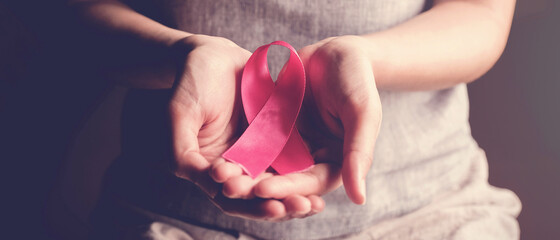

## <span style="color:hotpink;">Importing the necessary libraries</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.colors as colors
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
! pip install --user Xgboost
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")


## <span style="color:hotpink;">Import and Read the Data</span>

In [2]:
data = pd.read_csv('Bcancer.csv',encoding = 'latin1')

In [3]:
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

## <span style="color:hotpink;"> Dataset_details </span>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
data['diagnosis'].unique()

array([1, 0], dtype=int64)

<code style="background:pink;color:black"> **Data Explanation** </code>

* 1  - **"Malignant"** it is a type of tumour cell. Which can be able to spread along with the other cells. And it is may be a life threatenening one.
* 0 - **"Benign"** it is also a type of tumour cell. Which can not br able to spread over the other cells. Highlightly it is not a life threatened one.

0    357
1    212
Name: diagnosis, dtype: int64


<Axes: title={'center': 'Pie plot for Diagnosis Type'}, ylabel='diagnosis'>

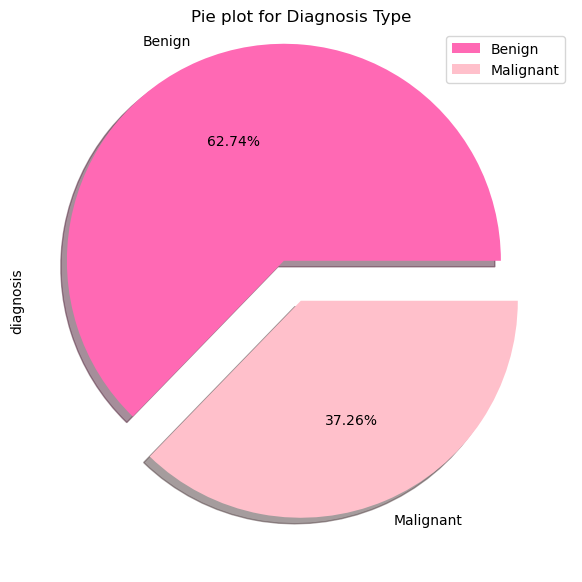

In [6]:
print(data['diagnosis'].value_counts())
data.diagnosis.value_counts().plot.pie(figsize=(7,10),
                                       labels = ['Benign','Malignant'],title = "Pie plot for Diagnosis Type",
                                       fontsize = 10,explode = [0.2,0],shadow = True,colors = ["hotpink","pink"],
                                       legend = True,autopct = '%.2f%%')

<code style="background:pink;color:black"> **Observations** </code>

* **The data contains Benign patients (357 counts) more than the Malignant patients (212 counts)**
* **More than 63% of the data has Benign patients**

Text(0.5, 1.0, 'Correlation Plot')

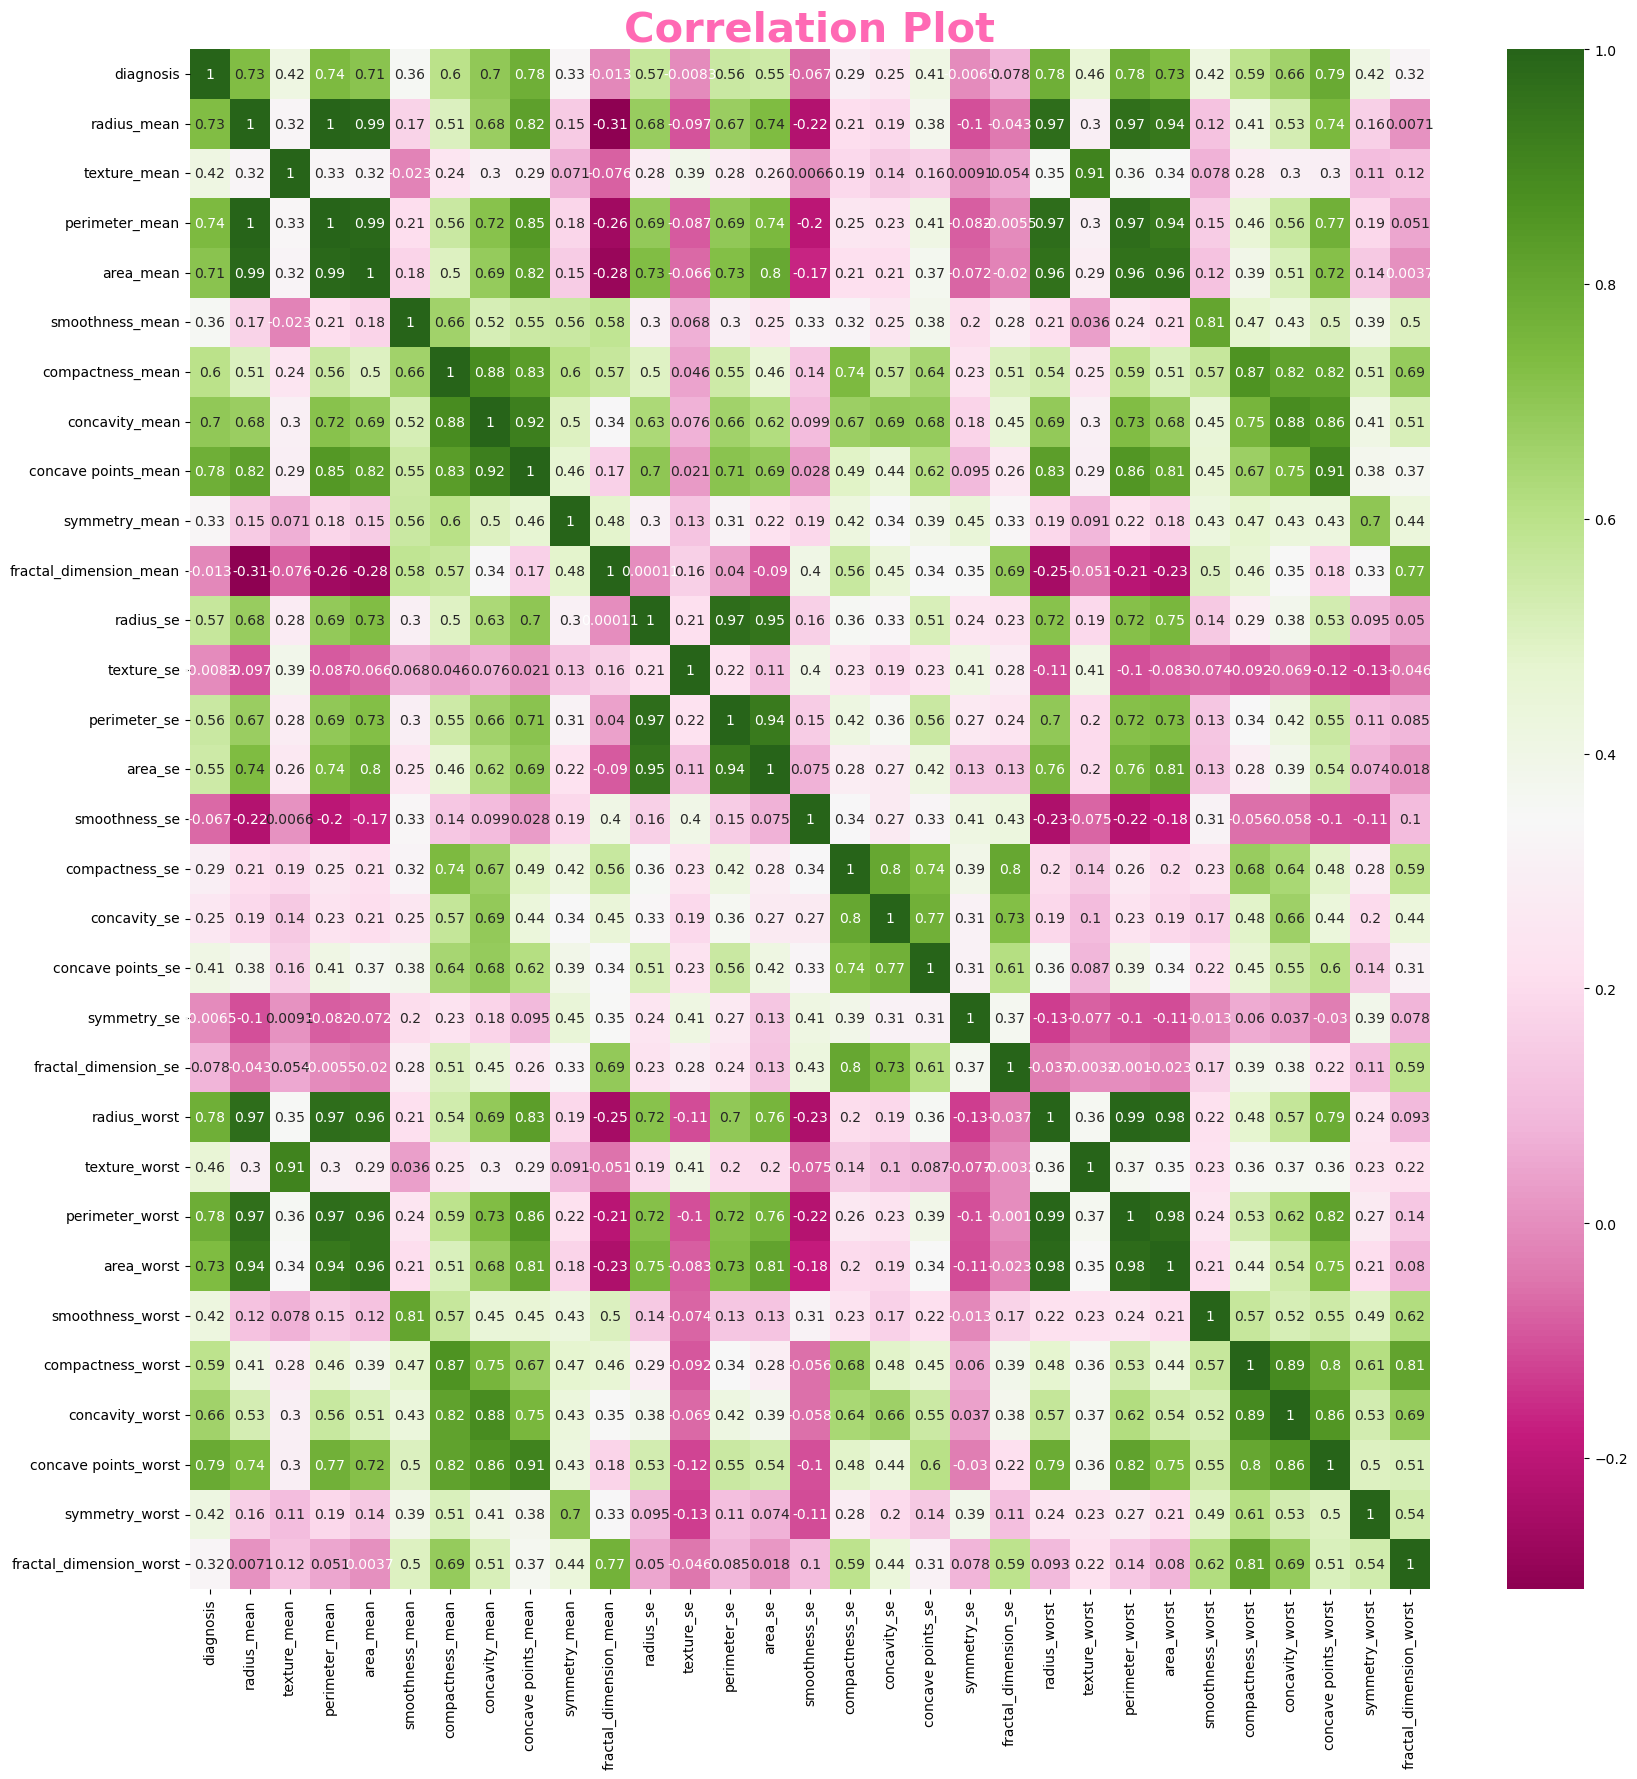

In [7]:
cr = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cr,cmap = 'PiYG',annot = True,cbar = True)
plt.title("Correlation Plot", fontweight = "bold", fontsize=30,color = 'hotpink')

In [8]:
cr[abs(cr['diagnosis']) > 0.6].index

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'radius_worst',
       'perimeter_worst', 'area_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

<code style="background:pink;color:black"> **Observations** </code>

#### * These are the columns that shows how high the diagnosis column correlated with other columns had **more than 60%** correlation  score.

In [9]:
df = data.copy()

<Axes: title={'center': 'Correlation range of diagnosis column with other columns'}>

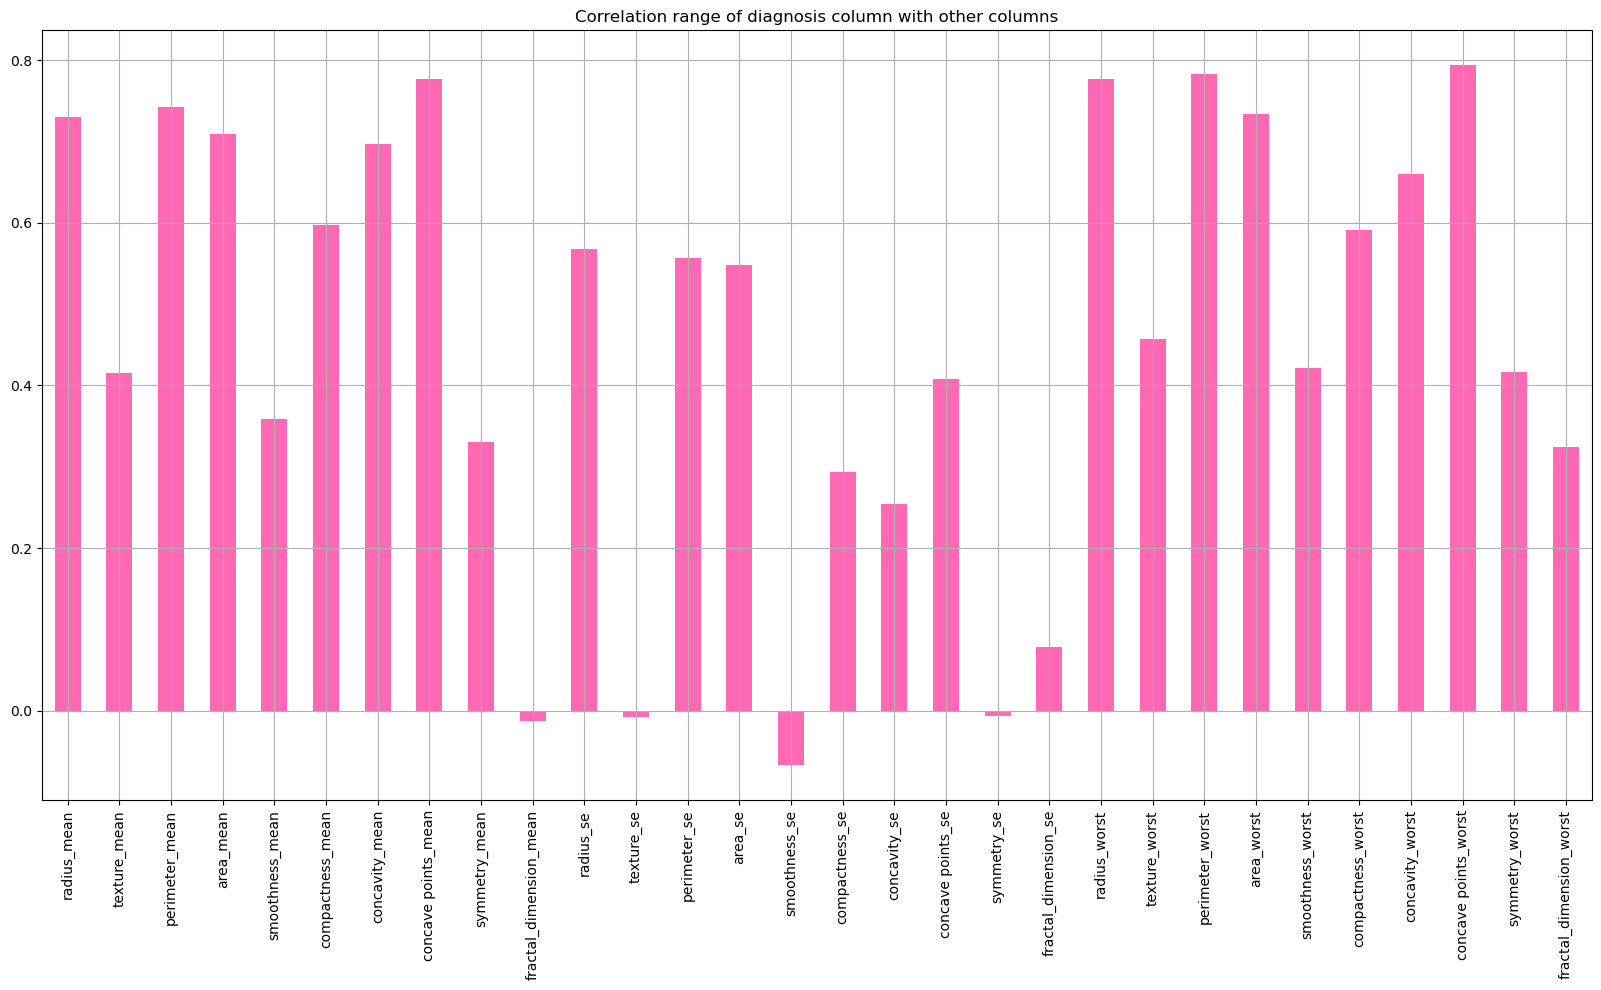

In [10]:
df.drop('diagnosis', axis=1).corrwith(df.diagnosis).plot(kind = 'bar' , grid = True , figsize=(20,10),
                                                         title = "Correlation range of diagnosis column with other columns",
                                                         color = 'hotpink')

<code style="background:pink;color:black"> **Observations** </code>

* There are only a handful of columns that show negative correlation with the 'diagnosis column' * Around half of our columns are more than 50% positively correlated to diagnosis column.

## <span style="color:hotpink;">Selecting attributes for building model</span>

In [11]:
cr1 = df.corr()
cr1
fltr = np.abs(cr1["diagnosis"])>0.60
cr1_fea = cr1.columns[fltr].tolist()

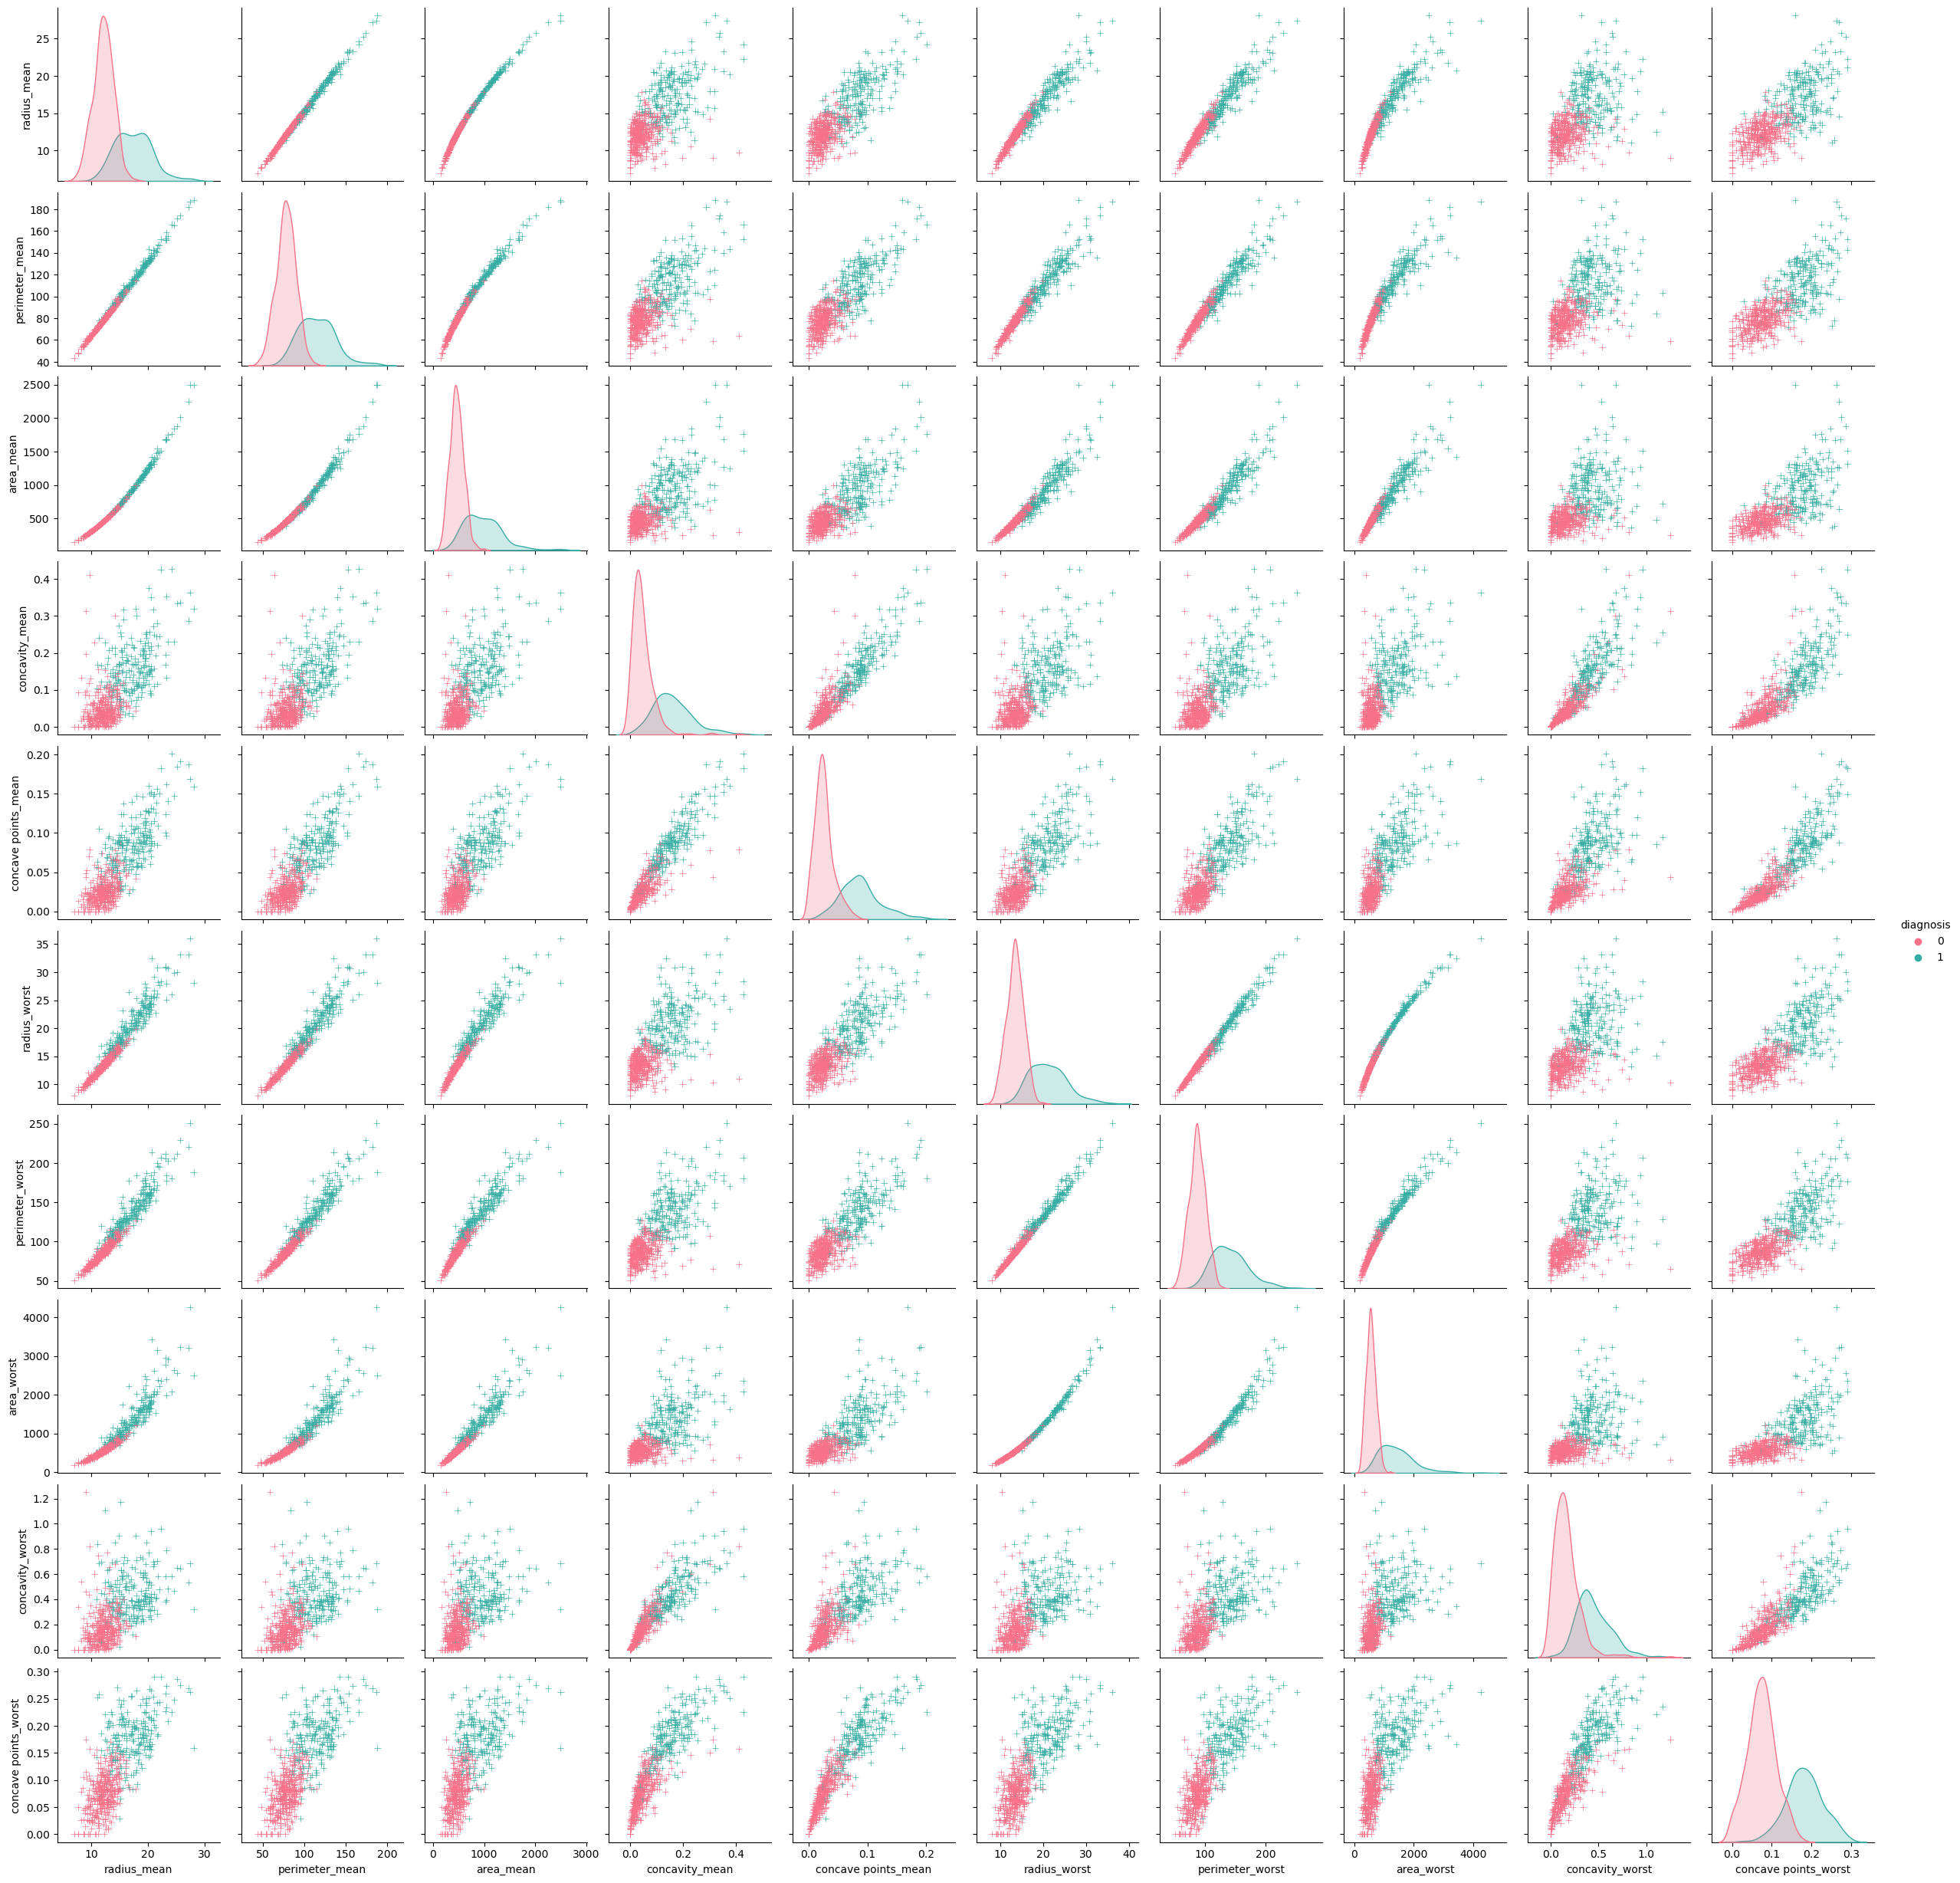

In [12]:
sns.pairplot(df[cr1_fea], diag_kind = "kde", markers = "+", hue = "diagnosis", palette='husl')
plt.show()

<code style="background:pink;color:black"> **Observations** </code>

We would need to eliminate the outliers so that it does not affects our model's accuracy.

## <span style="color:hotpink">Applying Train-Test Split & Applying Regression Models, Evaluating Accuracy</span>

In [13]:
X  = df.drop('diagnosis',axis = 1)
y = df[['diagnosis']]


X_train,X_test,y_train,y_test = train_test_split(X , y , test_size = 0.2,random_state = 42)

In [14]:
slr = StandardScaler()
scl_trn = slr.fit_transform(X_train)
scl_tst = slr.fit_transform(X_test)

### <span style="font-family:candara">Executing a Train-Test Split,Applying <mark>Logistic Regression Classifier</mark>, and Evaluating Accuracy</span>

In [15]:
lr = LogisticRegression(random_state = 42)
lr.fit(scl_trn,y_train)

LogisticRegression(random_state=42)

In [16]:
y_pred_lr = lr.predict(scl_tst)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.8f}")

Logistic Regression Accuracy: 0.98245614


### <span style="font-family:candara">Executing a Train-Test Split,Applying <mark>KNeighbours classifiers</mark>, and Evaluating Accuracy</span>

In [17]:
kn = KNeighborsClassifier()
kn.fit(scl_trn,y_train)

KNeighborsClassifier()

In [18]:
y_pred = kn.predict(scl_tst)

accuracy_kn = accuracy_score(y_test, y_pred)
print(f"KNeighbours Accuracy: {accuracy_kn:.2f}")

KNeighbours Accuracy: 0.96


### <span style="font-family:candara">Executing a Train-Test Split,Applying <mark>Support Vector Classifer</mark>, and Evaluating Accuracy</span>

In [19]:
svm = SVC(random_state=42)
svm.fit(scl_trn, y_train)

SVC(random_state=42)

In [20]:
y_pred_svm = svm.predict(scl_tst)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.8f}")

SVM Accuracy: 0.98245614


### <span style="font-family:candara">Executing a Train-Test Split,Applying <mark>Naive Bayes Algorithm</mark>, and Evaluating Accuracy</span>

In [21]:
nb= GaussianNB()
nb.fit(scl_trn, y_train)

GaussianNB()

In [22]:
y_pred = nb.predict(scl_tst)

accuracy_nb = accuracy_score(y_test,y_pred)
print(f"Naive Bayes accuracy score :{accuracy_nb: .2f}")

Naive Bayes accuracy score : 0.96


### <span style="font-family:candara">Executing a Train-Test Split,Applying <mark>RandomForest Classifier Algorithm</mark>, and Evaluating Accuracy</span>

In [23]:
rmc = RandomForestClassifier(random_state=42)
rmc.fit(scl_trn, y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_pred = rmc.predict(scl_tst)

accuracy_rmc = accuracy_score(y_test,y_pred)
print(f"Random forest classifier accuracy :{accuracy_rmc:.4f}")

Random forest classifier accuracy :0.9649


### <span style="font-family:candara">Executing a Train-Test Split,Applying <mark>Gradient Boosting Classifier Algorithm</mark>, and Evaluating Accuracy</span>

In [25]:
gb = GradientBoostingClassifier(random_state = 42)
gb.fit(scl_trn,y_train)

GradientBoostingClassifier(random_state=42)

In [26]:
y_pred = gb.predict(scl_tst)

accuracy_gb = accuracy_score(y_test,y_pred)
print(f"Gradient boosting accuracy: {accuracy_gb:.4f}")

Gradient boosting accuracy: 0.9649


### <span style="font-family:candara">Executing a Train-Test Split,Applying <mark>XGBoosting classifier Algorithm</mark>, and Evaluating Accuracy</span>

In [27]:
import xgboost as xgb

xgb = xgb.XGBClassifier(random_state = 42)
xgb.fit(scl_trn,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [28]:
y_pred = xgb.predict(scl_tst)

accuracy_xgb = accuracy_score(y_test,y_pred)
print(f"Gradient boosting accuracy: {accuracy_xgb:.4f}")

Gradient boosting accuracy: 0.9649


### <span style="font-family:candara">Executing a Train-Test Split,Applying <mark>Adaboost classifier Algorithm</mark>, and Evaluating Accuracy</span>

In [29]:
abc = AdaBoostClassifier()
abc.fit(scl_trn,y_train)

AdaBoostClassifier()

In [30]:
y_pred = abc.predict(scl_tst)

accuracy_abc = accuracy_score(y_test,y_pred)
print(f"Gradient boosting accuracy: {accuracy_abc:.4f}")

Gradient boosting accuracy: 0.9737


## <span style="color:hotpink;"> Comparing the Regression models Accuracy Score to Finalize the correct Model</span>

In [31]:
print("{:<25} {:<10}".format('Algorithm', 'Accuracy'))
print("-----------------------------------------------")

algorithm_names = ['Naive Bayes', 'Random Forest', 'SVM', 'Logistic Regression', 'Gradient Boosting', 'XGBoost','AdaBoost']
accuracies = [accuracy_nb, accuracy_rmc, accuracy_svm, accuracy_lr, accuracy_gb, accuracy_xgb,accuracy_abc]

for name, accuracy in zip(algorithm_names, accuracies):
    print("{:<25} {:<10.2f}%".format(name, accuracy * 100))

Algorithm                 Accuracy  
-----------------------------------------------
Naive Bayes               95.61     %
Random Forest             96.49     %
SVM                       98.25     %
Logistic Regression       98.25     %
Gradient Boosting         96.49     %
XGBoost                   96.49     %
AdaBoost                  97.37     %


In [32]:
algorithm_names = ['Naive Bayes', 'Random Forest', 'SVM', 'Logistic Regression', 'Gradient Boosting', 'XGBoost','AdaBoost']
accuracies = [accuracy_nb, accuracy_rmc, accuracy_svm, accuracy_lr, accuracy_gb, accuracy_xgb,accuracy_abc]

fig = go.Figure()

fig.add_trace(go.Scatter(x=algorithm_names, y=accuracies, mode='lines+markers'))

fig.update_layout(
    title='Comparison of Machine Learning Algorithms used for Accuracy prediction in Corrected texts',
    xaxis_title='Algorithm',
    yaxis_title='Accuracy',
    xaxis_tickangle=35,
    margin=dict(l=0, r=0, b=0, t=40),
)

fig.show()

<code style="background:pink;color:black"> **Observations** </code>

* We can clearly see that all our models perform with more than **90%** accuracy where ~~Naive bayes Gaussian~~ has the lowest of 95.058% then __LogisticRegression__ and __Support Vector classifier__ both has the highest of **98.25%** accuracy.

## <span style="color:hotpink;">Knowing the Performance of the model with high accuracy  by Classification Report</span>

### <span style="font-family:candara"><mark>Best model Comparision : Classification report</mark></span>

In [33]:
lr_cls_rep = classification_report(y_test,y_pred_lr)
print("Classification Report:\n", lr_cls_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [34]:
svm_cls_rep = classification_report(y_test,y_pred_svm)
print("Classification Report:\n", svm_cls_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [35]:
classification_reports = {
    "Logistic Regression":lr_cls_rep,
    "SVM": svm_cls_rep
}

report_data = []
for model, report in classification_reports.items():
    lines = report.split('\n')
    precision, recall, f1, support = [float(val) for val in lines[-2].split()[-4:]]
    report_data.append({'Model': model, 'Precision': precision, 'Recall': recall, 'F1-Score': f1, 'Support': support})

report_df = pd.DataFrame(report_data)

In [36]:
table_fig = go.Figure(data=[go.Table(
    header=dict(values=['Model', 'Precision', 'Recall', 'F1-Score', 'Support']),
    cells=dict(values=[report_df['Model'],
                        report_df['Precision'].round(4),
                        report_df['Recall'].round(4),
                        report_df['F1-Score'].round(4),
                        report_df['Support']])
)])





table_fig.update_layout(
    title='Model Comparison: Classification Report',
    margin=dict(l=0, r=0, t=40, b=0),
)

table_fig.show()